In [294]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["axes.grid"] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 14

save = True

In [295]:
#Import the trajectory of the first simulation
trajectory1 = np.loadtxt("trajectory_FENE.csv", delimiter=",", dtype=float)
position1 = trajectory1[:,:3]
position2 = trajectory1[:,3:6]
momentum1 = trajectory1[:,6:9]
momentum2 = trajectory1[:,9:12]
J_momentum = trajectory1[:,12:15]
energy = trajectory1[:,15]
time_steps = trajectory1[:,16]

len(position1[:,0])

2474

In [296]:
#Import the trajectory of the second simulation
trajectory_big = np.loadtxt("trajectory_FENE_big.csv", delimiter=",", dtype=float)
position1_big = trajectory_big[:,:3]
position2_big = trajectory_big[:,3:6]
momentum1_big = trajectory_big[:,6:9]
momentum2_big = trajectory_big[:,9:12]
J_momentum_big = trajectory_big[:,12:15]
energy_big = trajectory_big[:,15]
time_steps_big = trajectory_big[:,16]

len(position1_big[:,0])

618

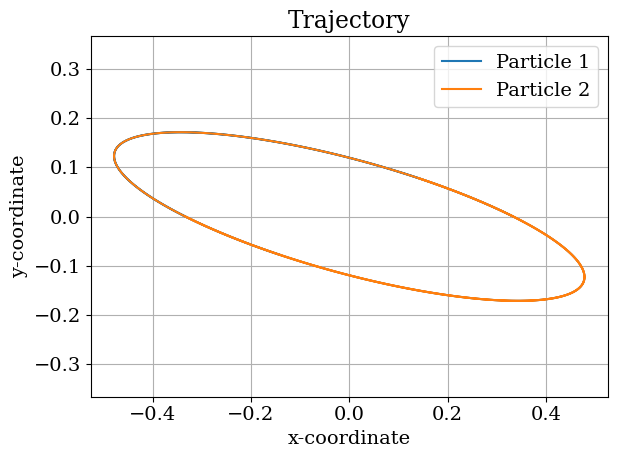

In [297]:
fig, ax = plt.subplots()
ax.plot(position1[:,0], position1[:,1], label = "Particle 1")
ax.plot(position2[:,0], position2[:,1], label = "Particle 2")
ax.set(title = "Trajectory", xlabel = "x-coordinate", ylabel = "y-coordinate")
ax.axis("equal")
ax.legend()
fig.tight_layout()

if(save):
    fig.savefig("FENE_traject1.png")

2474


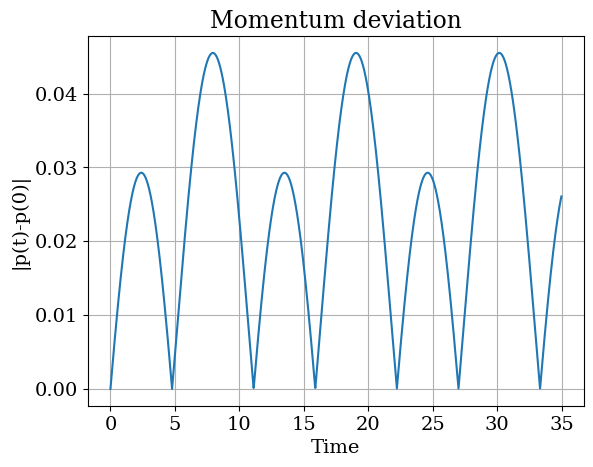

In [298]:
momentum1_total = momentum1[:,0]**2 + momentum1[:,1]**2 + momentum1[:,2]**2
momentum2_total = momentum2[:,0]**2 + momentum2[:,1]**2 + momentum2[:,2]**2

print(len(momentum1_total))

momentum_deviation = abs(((momentum1_total + momentum2_total) - (momentum1_total[0] + momentum2_total[0])))

fig2, ax2 = plt.subplots()
ax2.plot(time_steps, momentum_deviation)
ax2.set(title = "Momentum deviation", xlabel = "Time", ylabel = "|p(t)-p(0)|")

if(save):
    fig2.savefig("FENE_momentum_con.png")

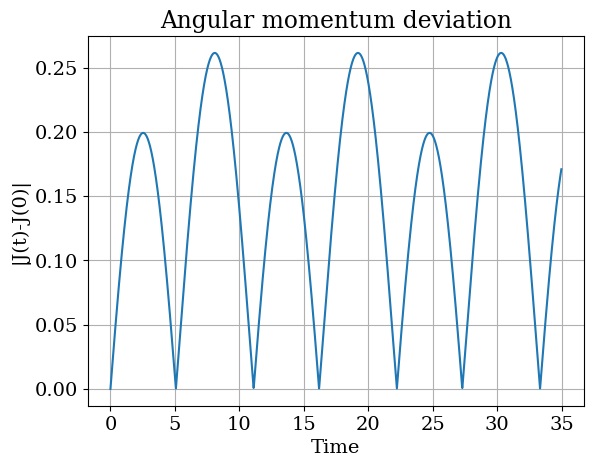

In [299]:
J_momentum_total = J_momentum[:,0]**2 + J_momentum[:,1]**2 + J_momentum[:,2]**2

figJ, axJ = plt.subplots()
axJ.plot(time_steps, abs(J_momentum_total - J_momentum_total[0]))

axJ.set(title = "Angular momentum deviation", xlabel = "Time", ylabel = "|J(t)-J(0)|")

if(save):
    figJ.savefig("FENE_J_momentum_con.png")

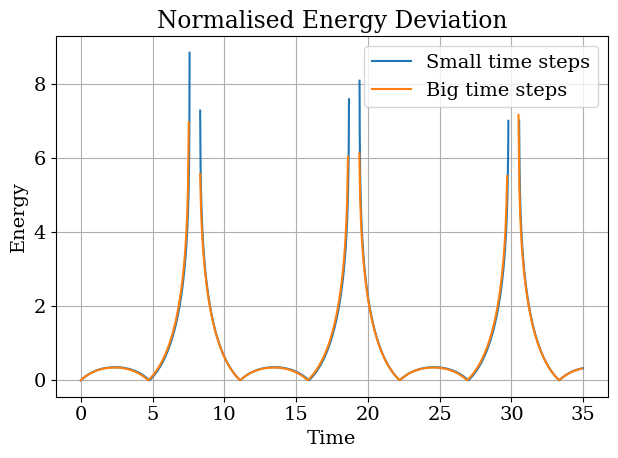

In [300]:
energy_dev = abs((energy- energy[0])/energy[0])
#energy_dev = abs((energy- energy[0]))
energy_dev_big = abs((energy_big - energy_big[0])/energy_big[0])
#energy_dev_big = abs((energy_big - energy_big[0]))

fig, ax = plt.subplots()
ax.plot(time_steps, energy_dev, label = "Small time steps")
ax.plot(time_steps_big, energy_dev_big, label = "Big time steps")
ax.set(title = "Normalised Energy Deviation", xlabel = "Time", ylabel = "Energy")
ax.legend()
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
fig.tight_layout()
if(save):
    fig.savefig("FENE_Energy_con.png")

In [301]:
energy_dev_big[energy_dev_big>1e5], energy[0]

(array([], dtype=float64), 0.180612)

In [302]:
maxSmall = max(abs((energy[5:]- energy[0])/energy[0]))
maxBig = max(abs((energy_big[5:] - energy_big[0])/energy_big[0]))

maxSmall, maxBig, 1.0/16, maxBig/maxSmall, 1e-4/6.1e-6

(8.83339977410139,
 7.155874827789805,
 0.0625,
 0.8100929439161224,
 16.393442622950822)

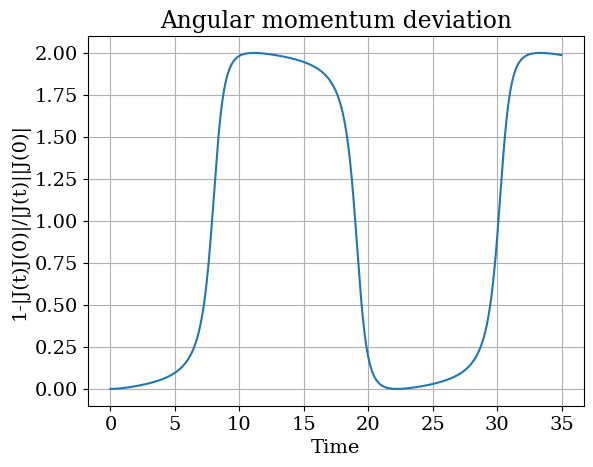

In [303]:
J_momentum_quantity =  1 - J_momentum.dot(J_momentum[0]) / (np.linalg.norm(J_momentum, axis = 1) * np.linalg.norm(J_momentum[0]))

fig3, ax3 = plt.subplots()
ax3.plot(time_steps, J_momentum_quantity)
ax3.set(title = "Angular momentum deviation", xlabel = "Time", ylabel = "1-|J(t)J(0)|/|J(t)||J(0)|")

if(save):
    fig3.savefig("FENE_Angular_momentum_diff.png")


In [304]:
time_steps[-1]

34.9735

In [305]:
print(energy_big)

[0.177835 0.174271 0.17086  0.167597 0.164475 0.16149  0.158637 0.155912
 0.153309 0.150825 0.148456 0.146197 0.144046 0.141998 0.14005  0.138199
 0.136441 0.134775 0.133196 0.131702 0.130292 0.128961 0.127709 0.126532
 0.125429 0.124397 0.123436 0.122543 0.121717 0.120955 0.120258 0.119623
 0.11905  0.118536 0.118082 0.117687 0.11735  0.117069 0.116846 0.116678
 0.116567 0.116511 0.116511 0.116567 0.116678 0.116845 0.117069 0.117349
 0.117686 0.118082 0.118535 0.119048 0.119622 0.120257 0.120954 0.121715
 0.122541 0.123434 0.124395 0.125427 0.12653  0.127706 0.128959 0.130289
 0.1317   0.133193 0.134771 0.136438 0.138195 0.140046 0.141994 0.144042
 0.146193 0.148451 0.15082  0.153304 0.155906 0.158632 0.161484 0.164469
 0.16759  0.170854 0.174264 0.177828 0.18155  0.185437 0.189494 0.19373
 0.198151 0.202764 0.207578 0.2126   0.217839 0.223305 0.229007 0.234957
 0.241164 0.247641 0.254401 0.261456 0.268822 0.276515 0.284551 0.292948
 0.301726 0.310908 0.320516 0.330576 0.341117 0.3521